Valid schedule found after 0 iterations:
Robot 1 Path: [(0, 0), (1, 1), (1, 2)]
Robot 2 Path: [(0, 2), (1, 3), (1, 2), (1, 1), (1, 0)]
Robot 3 Path: [(2, 1), (2, 0), (1, 0)]


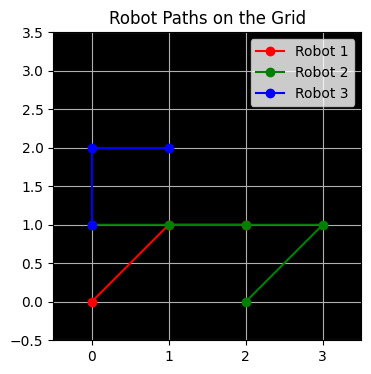

In [6]:
import heapq

# Implement the functions for CBS here (find_conflicts, resolve_conflict, calculate_cost)

def find_conflicts(robot_schedule):
    # Implement conflict detection logic
    conflicts = []
    occupied_pickup_positions = set()
    occupied_delivery_positions = set()
    
    for robot_tasks in robot_schedule:
        for pickup, delivery in robot_tasks:
            if pickup in occupied_pickup_positions or delivery in occupied_delivery_positions:
                conflicts.append((robot_schedule.index(robot_tasks), robot_schedule.index(robot_tasks)))
            occupied_pickup_positions.add(pickup)
            occupied_delivery_positions.add(delivery)
    
    return conflicts

def resolve_conflict(conflict, current_schedule):
    # Implement conflict resolution logic (swap tasks between robots)
    robot1_idx, robot2_idx = conflict
    robot1_tasks = current_schedule[robot1_idx]
    robot2_tasks = current_schedule[robot2_idx]
    
    # Swap the tasks between the robots
    new_robot1_tasks = robot2_tasks
    new_robot2_tasks = robot1_tasks

    # Update the schedules with the swapped tasks
    new_schedule = current_schedule[:]
    new_schedule[robot1_idx] = new_robot1_tasks
    new_schedule[robot2_idx] = new_robot2_tasks

    return new_schedule

def calculate_cost(robot_schedule):
    # Implement cost calculation for the schedule
    cost = 0
    for robot_tasks in robot_schedule:
        for pickup, delivery in robot_tasks:
            # Find path from start to pickup
            path = a_star(grid, pickup, delivery)
            if path is not None:
                cost += len(path) - 1  # Subtract 1 to account for starting cell
    return cost

# Define a function to find neighbors of a given cell
def get_neighbors(node):
    neighbors = []
    x, y = node
    # Define valid moves (up, down, left, right)
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    for dx, dy in moves:
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < len(grid) and 0 <= new_y < len(grid[0]) and grid[new_x][new_y] == 0:
            neighbors.append((new_x, new_y))
    return neighbors

# A* algorithm
def a_star(grid, start, goal):
    # Initialize data structures
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_values = {start: 0}
    f_values = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(current):
            tentative_g = g_values[current] + 1  # Assuming uniform cost for simplicity

            if neighbor not in g_values or tentative_g < g_values[neighbor]:
                came_from[neighbor] = current
                g_values[neighbor] = tentative_g
                f_values[neighbor] = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_values[neighbor], neighbor))

    return None  # No path found

# Function to reconstruct the path
def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.insert(0, current)
        current = came_from[current]
    path.insert(0, current)
    return path


# Define the heuristic (Manhattan distance)
def heuristic(node, goal):
    x1, y1 = node
    x2, y2 = goal
    return abs(x1 - x2) + abs(y1 - y2)

# Define the grid
grid = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

# Define robot tasks as (start, pickup) and (delivery, end) tuples
robot1_tasks = [((0, 0), (0, 1)), ((1, 1), (2, 2))]
robot2_tasks = [((0, 2), (0, 3)), ((1, 3), (2, 0))]
robot3_tasks = [((2, 1), (2, 0)), ((2, 0), (1, 1))]

# Call the CBS algorithm
schedule = [robot1_tasks, robot2_tasks, robot3_tasks]
initial_schedule = schedule[:]  # Store the initial schedule for comparison

# CBS algorithm loop
num_iterations = 0
while True:
    conflicts = find_conflicts(schedule)
    if not conflicts:
        break  # No conflicts, the schedule is valid
    else:
        # Resolve conflicts
        new_schedule = resolve_conflict(conflicts[0], schedule)
        if new_schedule == schedule:
            # If the schedule hasn't changed, break to prevent an infinite loop
            break
        else:
            schedule = new_schedule
    num_iterations += 1

import matplotlib.pyplot as plt

def visualize_grid(grid, robot_paths):
    plt.figure(figsize=(len(grid[0]), len(grid)))
    plt.imshow(grid, cmap='gray')

    # Plot robot paths
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    for i, robot_path in enumerate(robot_paths):
        x, y = zip(*robot_path)
        plt.plot(y, x, label=f'Robot {i + 1}', color=colors[i % len(colors)], marker='o')

    plt.legend()
    plt.title('Robot Paths on the Grid')
    plt.gca().invert_yaxis()  # Invert y-axis to match grid coordinates
    plt.grid(visible=True)
    plt.show()


if schedule:
    print("Valid schedule found after", num_iterations, "iterations:")
    robot_paths = []
    for i, robot_tasks in enumerate(schedule):
        robot_path = []
        for pickup, delivery in robot_tasks:
            # Find path for each task and append it to the robot's path
            path = a_star(grid, pickup, delivery)
            if path is not None:
                robot_path += path[:-1]  # Exclude the last cell to avoid duplication
            else:
                print(f"Warning: No valid path found for Robot {i + 1} for task {pickup} -> {delivery}")
        robot_paths.append(robot_path)
        print(f"Robot {i + 1} Path:", robot_path)

    # Visualize the grid and robot paths
    visualize_grid(grid, robot_paths)
else:
    print("No valid schedule found.")